불균형 데이터에서 k-neigbors 조절하여 변화파악하기

https://thedatascientist.com/handling-imbalanced-datasets-with-smote-in-python/

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance
from collections import Counter

In [21]:
# 불균형 데이터 셋 형성
X1, Y1 = make_classification(n_classes=2, weights=[0.01,0.99],n_features=2, 
                           n_clusters_per_class=1, n_samples=2000, random_state=10, n_redundant=0, n_informative=2)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 1966, 0: 34})


In [39]:
X1

array([[-0.41479099, -0.58177431],
       [-1.58454437, -2.93886404],
       [-1.2410019 , -0.99437979],
       ...,
       [-0.72459763, -1.323593  ],
       [-0.77249249, -1.931019  ],
       [-0.87269427, -0.63317698]])

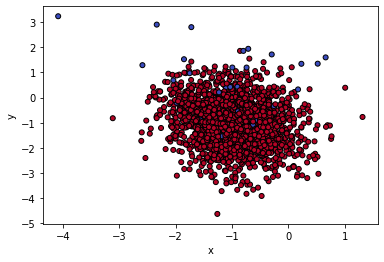

In [22]:
# 시각화
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

In [23]:
# df 만들기
df = pd.concat([pd.DataFrame(X1), pd.DataFrame(Y1)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']

In [24]:
df

,feature_1,feature_2,label
0,-0.414791,-0.581774,1
1,-1.584544,-2.938864,1
2,-1.241002,-0.994380,1
3,-0.126526,-0.756426,1
4,-0.759280,0.015976,1
...,...,...,...
1995,-0.282575,-1.471434,1
1996,-0.945347,-1.481019,1
1997,-0.724598,-1.323593,1
1998,-0.772492,-1.931019,1


1. SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100

# k가 1개 일때
# SMOTE number of neighbors
k = 1
X = df.loc[:, df.columns != 'label']
y = df.label

In [29]:
X

,feature_1,feature_2
0,-0.414791,-0.581774
1,-1.584544,-2.938864
2,-1.241002,-0.994380
3,-0.126526,-0.756426
4,-0.759280,0.015976
...,...,...
1995,-0.282575,-1.471434
1996,-0.945347,-1.481019
1997,-0.724598,-1.323593
1998,-0.772492,-1.931019


In [30]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: label, Length: 2000, dtype: int32

In [31]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

In [36]:
Counter(y_res)

Counter({1: 1966, 0: 1966})

In [41]:
X_res=X_res.values
y_res=y_res.values

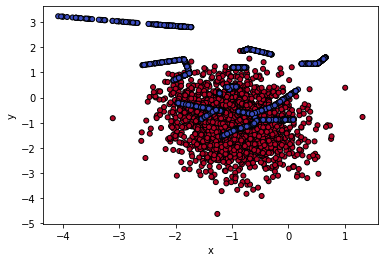

In [43]:
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res, s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

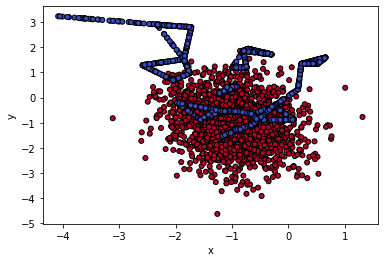

In [44]:
# k가 2개
# SMOTE number of neighbors
k = 2

X = df.loc[:, df.columns != 'label']
y = df.label

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

X_res, y_res = sm.fit_resample(X, y)

# array 형성
X_res=X_res.values
y_res=y_res.values

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

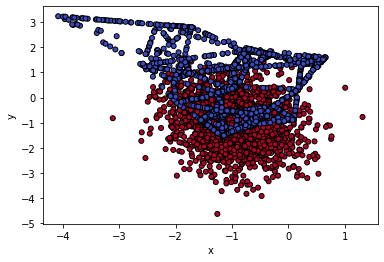

In [45]:
# k가 5개
# SMOTE number of neighbors
k = 5

X = df.loc[:, df.columns != 'label']
y = df.label

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

X_res, y_res = sm.fit_resample(X, y)

# array 형성
X_res=X_res.values
y_res=y_res.values

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

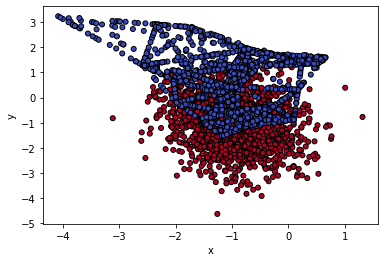

In [46]:
# k가 8개
# SMOTE number of neighbors
k = 8

X = df.loc[:, df.columns != 'label']
y = df.label

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

X_res, y_res = sm.fit_resample(X, y)

# array 형성
X_res=X_res.values
y_res=y_res.values

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

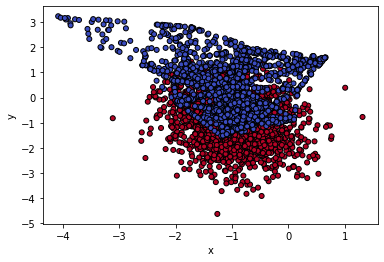

In [47]:
# k가 15개
# SMOTE number of neighbors
k = 15

X = df.loc[:, df.columns != 'label']
y = df.label

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

X_res, y_res = sm.fit_resample(X, y)

# array 형성
X_res=X_res.values
y_res=y_res.values

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

2. ADASYN

In [49]:
from imblearn.over_sampling import ADASYN

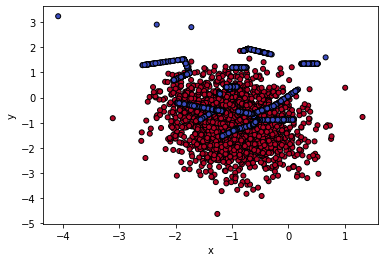

In [58]:
# k가 1개
# ADASYN number of neighbors
seed = 100
k = 1

X = df.loc[:, df.columns != 'label']
y = df.label

ada = ADASYN(sampling_strategy='auto', n_neighbors=k, random_state=seed)

X_res, y_res = ada.fit_resample(X, y)

# array 형성
X_res=X_res.values
y_res=y_res.values

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

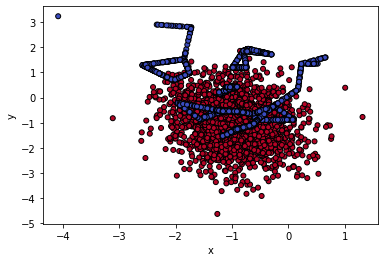

In [62]:
# k가 2개
k = 2

X = df.loc[:, df.columns != 'label']
y = df.label

ada = ADASYN(sampling_strategy='auto', n_neighbors=k, random_state=seed)

X_res, y_res = ada.fit_resample(X, y)

# array 형성
X_res=X_res.values
y_res=y_res.values

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

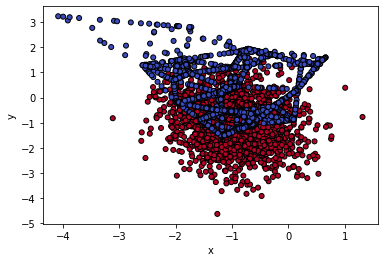

In [59]:
# k가 5개
k = 5

X = df.loc[:, df.columns != 'label']
y = df.label

ada = ADASYN(sampling_strategy='auto', n_neighbors=k, random_state=seed)

X_res, y_res = ada.fit_resample(X, y)

# array 형성
X_res=X_res.values
y_res=y_res.values

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

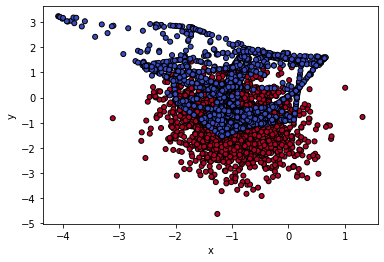

In [60]:
# k가 8개
k = 8

X = df.loc[:, df.columns != 'label']
y = df.label

ada = ADASYN(sampling_strategy='auto', n_neighbors=k, random_state=seed)

X_res, y_res = ada.fit_resample(X, y)

# array 형성
X_res=X_res.values
y_res=y_res.values

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

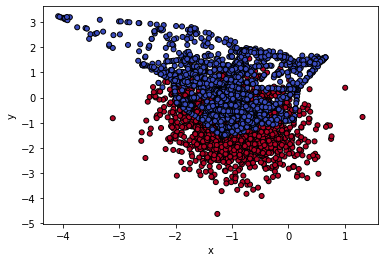

In [61]:
# k가 15개
k = 15

X = df.loc[:, df.columns != 'label']
y = df.label

ada = ADASYN(sampling_strategy='auto', n_neighbors=k, random_state=seed)

X_res, y_res = ada.fit_resample(X, y)

# array 형성
X_res=X_res.values
y_res=y_res.values

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()